# TODO

* Analisar o casamento dos itinerários no código:
    Itinerários com maiores diferenças: 161,248,255
    
* Validar a saída: investigar porque existe mais de uma linha com horários iguais.

# Bus Trips Analysis
## Questões
1 - Qual a diferença entre o embarque no primeiro e o segundo ? 
2 - Considerando a baldeação qual a quantidade de viagens em que a diferença entre o primeiro e o segundo ônibus é maior que 70 minutos ?
3 - Qual o horário em que as baldeações ultrapassam 70 minutos ?
4 - Quais são as provavéis causas para os atrasos ? O período de descanso dos motoristas(intervalo) influencia nos atrasos ? Nos horários de pico existem atrasos ? Nestes mesmos horários a quantidade de ônibus aumenta ?

Importação de depêndencias

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pandas_profiling as pp
from datetime import datetime, timedelta
%matplotlib inline


plt.style.use('ggplot')

Importação de arquivo csv e visualização das principais colunas

In [4]:
bus_itineraries = pd.read_csv('data/output/output_bulma_otp.csv')

In [7]:
bus_itineraries[['otp_itinerary_id',"otp_leg_id","otp_mode", "otp_start_time","otp_end_time", "bt_start_time","bt_end_time", "bt_duration_mins"]].head()

,otp_itinerary_id,otp_leg_id,otp_mode,otp_start_time,otp_end_time,bt_start_time,bt_end_time,bt_duration_mins
0,9,1,WALK,2019-05-13 5:26:45,2019-05-13 5:26:46,2019-05-13 6:29:21,2019-05-13 6:29:21,NaN
1,9,2,BUS,2019-05-13 5:26:47,2019-05-13 5:55:02,2019-05-13 6:29:21,2019-05-13 7:04:54,3.555000e+03
2,9,3,WALK,2019-05-13 5:55:02,2019-05-13 5:57:21,2019-05-13 7:04:54,2019-05-13 7:06:54,NaN
3,9,4,BUS,2019-05-13 6:01:05,2019-05-13 6:08:04,2019-05-13 7:15:28,2019-05-13 7:25:09,9.683330e+15
4,9,5,WALK,2019-05-13 6:08:05,2019-05-13 6:08:06,2019-05-13 7:25:09,2019-05-13 7:25:09,NaN


In [0]:
#filtered_sched_obs_start_time = bus_itineraries.sched_obs_start_timediff.dropna()
#mean = filtered_sched_obs_start_time.apply(lambda x: np.mean(x))
#parsed_sched_obs_start_time = filtered_sched_obs_start_time.apply(lambda x : x/pd.Timedelta('1m'))

#filtered_sched_obs_end_time = bus_itineraries.sched_obs_end_timediff.dropna()
#mean = filtered_sched_obs_start_time.apply(lambda x: np.mean(x))
#parsed_sched_obs_end_time = filtered_sched_obs_end_time.apply(lambda x : x/pd.Timedelta('1m'))

#diff_trip_time = parsed_sched_obs_end_time - parsed_sched_obs_start_time

#diff_trip_time

## Duração total da viagem observada

In [0]:
bt_duration_mins = bus_itineraries.bt_duration_mins.dropna()

In [108]:
bt_duration_mins.describe()

count    476.000000
mean      27.158263
std       16.272643
min        0.633333
25%       11.250000
50%       27.583333
75%       38.775000
max      112.733333
Name: bt_duration_mins, dtype: float64

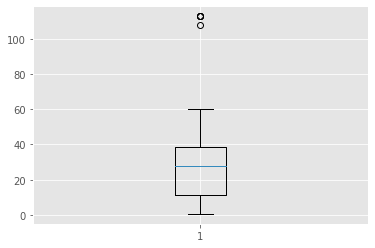

In [109]:
plt.boxplot(bt_duration_mins)
plt.show()

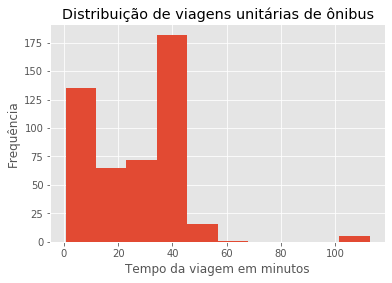

<Figure size 720x360 with 0 Axes>

In [110]:
plt.hist(bt_duration_mins)
plt.title('Distribuição de viagens unitárias de ônibus')
plt.xlabel('Tempo da viagem em minutos')
plt.ylabel('Frequência')
plt.figure(figsize=(10,5))
plt.show()

In [9]:
df = bus_itineraries

In [10]:
df.groupby(['otp_user_trip_id']).apply(lambda x: str(x['bt_start_time']))
#df.groupby(['otp_user_trip_id']).apply(lambda x: pd.to_datetime(x['bt_start_time']))
df.bt_start_time.dtype
df.size


20009

In [28]:
df.columns

Index(['otp_user_trip_id', 'otp_itinerary_id', 'otp_leg_id', 'otp_mode',
       'otp_route', 'bt_bus_code', 'bt_trip_num', 'otp_from_stop_id',
       'otp_start_time', 'bt_start_time', 'sched_obs_start_timediff',
       'otp_to_stop_id', 'otp_end_time', 'bt_end_time',
       'sched_obs_end_timediff', 'otp_duration_mins', 'bt_duration_mins'],
      dtype='object')

In [29]:
bus_itineraries[['otp_itinerary_id',"otp_leg_id","otp_mode", "otp_start_time","otp_end_time", "bt_start_time","bt_end_time", 
                 "bt_duration_mins", "bt_bus_code"]].head(40)

,otp_itinerary_id,otp_leg_id,otp_mode,otp_start_time,otp_end_time,bt_start_time,bt_end_time,bt_duration_mins,bt_bus_code
0,9,1,WALK,2019-05-13 5:26:45,2019-05-13 5:26:46,2019-05-13 6:29:21,2019-05-13 6:29:21,NaN,NaN
1,9,2,BUS,2019-05-13 5:26:47,2019-05-13 5:55:02,2019-05-13 6:29:21,2019-05-13 7:04:54,3.555000e+03,1002.0
2,9,3,WALK,2019-05-13 5:55:02,2019-05-13 5:57:21,2019-05-13 7:04:54,2019-05-13 7:06:54,NaN,NaN
3,9,4,BUS,2019-05-13 6:01:05,2019-05-13 6:08:04,2019-05-13 7:15:28,2019-05-13 7:25:09,9.683330e+15,1018.0
4,9,5,WALK,2019-05-13 6:08:05,2019-05-13 6:08:06,2019-05-13 7:25:09,2019-05-13 7:25:09,NaN,NaN
5,10,1,WALK,2019-05-13 5:26:45,2019-05-13 5:26:46,2019-05-13 6:29:21,2019-05-13 6:29:21,NaN,NaN
6,10,2,BUS,2019-05-13 5:26:47,2019-05-13 5:55:02,2019-05-13 6:29:21,2019-05-13 7:04:54,3.555000e+03,1002.0
7,10,3,WALK,2019-05-13 5:55:02,2019-05-13 5:57:21,2019-05-13 7:04:54,2019-05-13 7:06:54,NaN,NaN
8,10,4,BUS,2019-05-13 6:01:05,2019-05-13 6:08:04,2019-05-13 7:15:28,2019-05-13 7:25:09,9.683330e+15,1018.0
9,10,5,WALK,2019-05-13 6:08:05,2019-05-13 6:08:06,2019-05-13 7:25:09,2019-05-13 7:25:09,NaN,NaN


###Encontrando tempo total de um itinerário

In [51]:
itinerary_id = df.otp_itinerary_id.iloc[0] #recuperando ID da primeira linha
#gerar index out bounds
times = []
start_time_first_bus = []
start_time_second_bus = []

for i in range(len(df)-2):
    row = df.iloc[i]
    
    # considerando somente a primeira leg par de cada itinerário para cálculo do tempo de 'baldeação'
    if (row.otp_leg_id % 2 == 0 and row.otp_itinerary_id == itinerary_id 
        and df.otp_itinerary_id.iloc[i+2] == itinerary_id):
            
            times.append( pd.to_datetime(df.bt_start_time.iloc[i+2]) -  pd.to_datetime(df.bt_start_time.iloc[i]))
            start_time_first_bus.append(df.bt_start_time.iloc[i])
            start_time_second_bus.append(df.bt_start_time.iloc[i+2])
            
            #imprime os itinerários com maiores horários de "baldeação"
            if (pd.to_datetime(df.bt_start_time.iloc[i+2]) -  pd.to_datetime(df.bt_start_time.iloc[i]) > timedelta(minutes=150)):
                print(row.otp_itinerary_id)
                
            
    itinerary_id = row.otp_itinerary_id


161
248
255


In [23]:
times

[Timedelta('0 days 00:46:07'),
 Timedelta('0 days 00:46:07'),
 Timedelta('0 days 00:55:11'),
 Timedelta('0 days 00:54:07'),
 Timedelta('0 days 00:54:07'),
 Timedelta('0 days 00:54:07'),
 Timedelta('0 days 00:54:07'),
 Timedelta('0 days 00:58:21'),
 Timedelta('0 days 00:46:07'),
 Timedelta('0 days 00:54:07'),
 Timedelta('0 days 00:54:07'),
 Timedelta('0 days 00:58:21'),
 Timedelta('0 days 00:46:07'),
 Timedelta('0 days 00:46:07'),
 Timedelta('0 days 00:46:07'),
 Timedelta('0 days 00:46:07'),
 Timedelta('0 days 01:37:45'),
 Timedelta('0 days 00:54:07'),
 Timedelta('0 days 00:46:07'),
 Timedelta('0 days 00:46:07'),
 Timedelta('0 days 00:46:07'),
 Timedelta('0 days 00:46:07'),
 Timedelta('0 days 00:46:07'),
 Timedelta('0 days 00:58:21'),
 Timedelta('0 days 00:46:07'),
 Timedelta('0 days 00:54:07'),
 Timedelta('0 days 00:54:07'),
 Timedelta('0 days 00:54:07'),
 Timedelta('0 days 00:54:07'),
 Timedelta('0 days 00:55:11'),
 Timedelta('0 days 00:54:07'),
 Timedelta('0 days 00:46:07'),
 Timedel

In [31]:
diff_bus_trips = pd.DataFrame(data=times)
diff_bus_trips

,0
0,00:46:07
1,00:46:07
2,00:55:11
3,00:54:07
4,00:54:07
5,00:54:07
6,00:54:07
7,00:58:21
8,00:46:07
9,00:54:07


In [32]:
teste = pd.DataFrame({
    'horarios': times,
    'primeiro_onibus': start_time_first_bus,
    'segundo_onibus': start_time_second_bus
})


scheduled_bus_times2 = teste.iloc[::2]
scheduled_bus_times2.dropna()
scheduled_bus_times2.head()

,horarios,primeiro_onibus,segundo_onibus
0,00:46:07,2019-05-13 6:29:21,2019-05-13 7:15:28
2,00:55:11,2019-05-13 6:29:21,2019-05-13 7:24:32
4,00:54:07,2019-05-13 6:29:21,2019-05-13 7:23:28
6,00:54:07,2019-05-13 6:29:21,2019-05-13 7:23:28
8,00:46:07,2019-05-13 6:29:21,2019-05-13 7:15:28


In [33]:
#bus_itineraries[['otp_itinerary_id',"otp_leg_id","otp_mode", "bt_start_time"]].tail(50)

In [34]:
#retira horário em que a diferença é negativa
bus_times = diff_bus_trips.iloc[::2]
bus_times.columns = ['horarios']
bus_times.dropna()
bus_times.head()

,horarios
0,00:46:07
2,00:55:11
4,00:54:07
6,00:54:07
8,00:46:07


In [35]:
#bus_times.to_csv('/bus_times.csv', index=False)

In [36]:
bus_times.describe()

,horarios
count,119
mean,0 days 01:04:23.605042
std,0 days 00:28:05.792140
min,0 days 00:33:37
25%,0 days 00:46:07
50%,0 days 00:54:07
75%,0 days 01:09:54.500000
max,0 days 02:58:13


In [37]:
bus_times.dtypes

horarios    timedelta64[ns]
dtype: object

Text(0.5, 1.0, "Distribuição do tempo das 'bakdeações'")

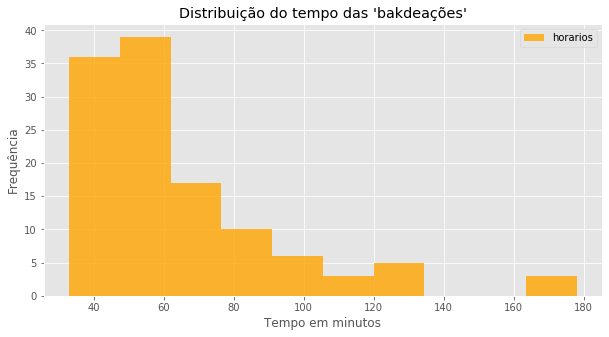

In [38]:
times_plot = bus_times.astype('timedelta64[m]').plot.hist(alpha = 0.8, figsize=(10,5),  color="orange")
times_plot.set_xlabel("Tempo em minutos")
times_plot.set_ylabel("Frequência")
times_plot.set_title("Distribuição do tempo das 'bakdeações'")

Text(0.5, 1.0, 'Gráfico de densidade')

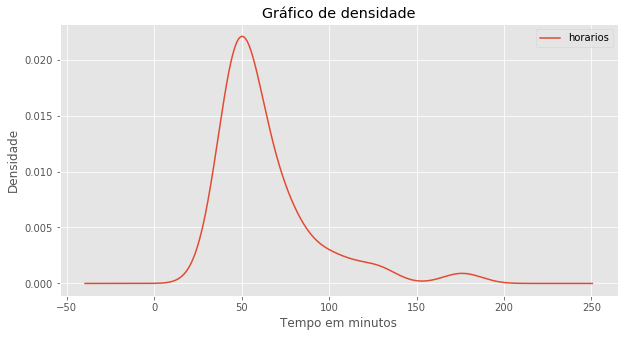

In [39]:
density_bus_times = bus_times.astype('timedelta64[m]').plot.density(figsize=(10,5))
density_bus_times.set_xlabel("Tempo em minutos")
density_bus_times.set_ylabel("Densidade")
density_bus_times.set_title("Gráfico de densidade")

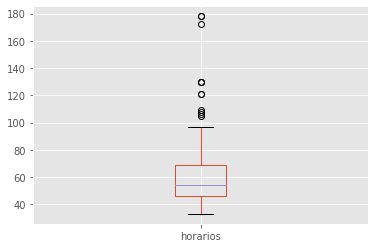

In [40]:
bus_times.astype('timedelta64[m]').plot.box()

##Análise sobre a integração temporal

- Quantos itinerários o  tempo entre embarcar no primeiro ônibuse e realizar a baldeação é menor que 70 minutos ?  

Número total de horários de ônibus após validação

In [41]:
bus_times.size

119

In [42]:
gte_70min = bus_times[bus_times.horarios > timedelta(minutes=70)]
lte_70min = bus_times[bus_times.horarios <= timedelta(minutes=70)]

Número total de itinerários que o tempo entre o primeiro e o segundo ônibus é maior que 70 minutos:

In [43]:
gte_70min.size

28

Número total de itinerários que o tempo entre o primeiro e o segundo ônibus é menor que 70 minutos:

In [44]:
lte_70min.size

91

In [79]:
#porcentagem de ônibus que estouram os 70 minutos para a integração temporal
percentage_gte = gte_70min.size / bus_times.size
percentage_gte * 100

23.52941176470588

Text(0.5, 1.0, 'Distribuição do tempo de espera maior que 70 minutos')

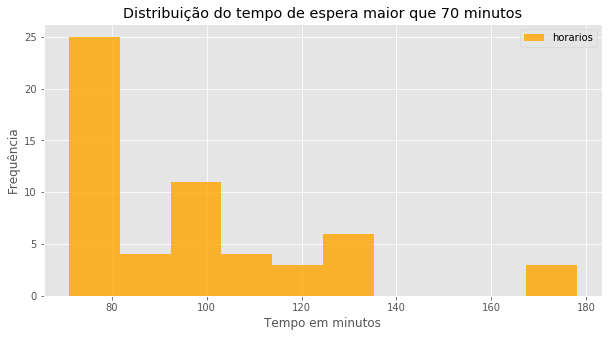

In [100]:
trips_gte70 = gte_70min.astype('timedelta64[m]').plot.hist(alpha = 0.8, figsize=(10,5),  color="orange")
trips_gte70.set_xlabel("Tempo em minutos")
trips_gte70.set_ylabel("Frequência")
trips_gte70.set_title("Distribuição do tempo de espera maior que 70 minutos")

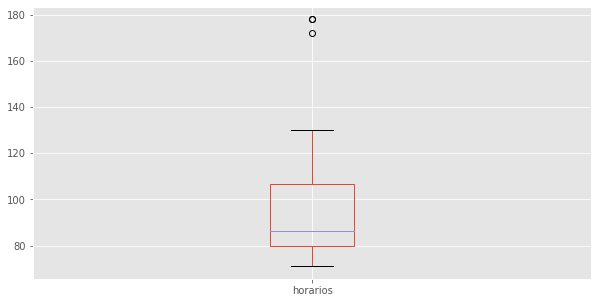

In [66]:
gte_70min.astype('timedelta64[m]').plot.box(figsize=(10,5))